Ideas:
* Look at EOFs for other output variables, like clouds, ET
* Different spatial patterns for different parameters

* Find method for determining the number of EOFs that are statistically significant, how many EOFs needed to reconstruct -- something to calculate this threshold, Chris Bretherton, Dennis??


Plotting distributions of deltas

# Set up workspace

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from scipy.stats import ttest_ind
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from eofs.xarray import Eof 

In [2]:
import sys
sys.path.append('/glade/u/home/czarakas/coupled_PPE/code/utils')

In [3]:
from load_ensembles import *
import quick_map

# Load data

In [11]:
var='TS'
domain='atm'

## Load full ensemble data

In [12]:
ensemble_coupled = load_coupled_ensemble(var=var, domain=domain, printon=False)

/glade/u/home/czarakas/coupled_PPE/code/utils/load_ensembles.py:46: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  ds = xr.open_mfdataset(fpath)
/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


In [10]:
ensemble_offline = load_offline_ensemble(var=var, domain='lnd', printon=False)

no /glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0001_PI_v02/lnd/proc/tseries/OFFL0001_PI_v02.clm2.h0.timeseries.TREFHT.nc
no /glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0002_PI_v02/lnd/proc/tseries/OFFL0002_PI_v02.clm2.h0.timeseries.TREFHT.nc
no /glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0007_PI_v02/lnd/proc/tseries/OFFL0007_PI_v02.clm2.h0.timeseries.TREFHT.nc
no /glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0008_PI_v02/lnd/proc/tseries/OFFL0008_PI_v02.clm2.h0.timeseries.TREFHT.nc
no /glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0009_PI_v02/lnd/proc/tseries/OFFL0009_PI_v02.clm2.h0.timeseries.TREFHT.nc
no /glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0010_PI_v02/lnd/proc/tseries/OFFL0010_PI_v02.clm2.h0.timeseries.TREFHT.nc
no /glade/campaign/cgd/tss/czarakas/CoupledPPE/offline_simulations/OFFL0013_PI_v02/lnd/proc/tseries/OFFL0013_PI_v02.clm2.h0.timese

In [13]:
basecase_lnd=xr.open_dataset('/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/'+
                             'COUP0000_PI_SOM/lnd/proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.'+var+'.nc')
ref_tseries=basecase_lnd[var][60*12:,:,:].groupby('time.year').mean(dim='time')

FileNotFoundError: [Errno 2] No such file or directory: b'/glade/campaign/cgd/tss/czarakas/CoupledPPE/coupled_simulations/COUP0000_PI_SOM/lnd/proc/tseries/COUP0000_PI_SOM.clm2.h0.timeseries.TS.nc'

In [ ]:
from load_gridcell_areas import *

## Make a data array that stacks all the differences from the reference 
(i.e. dimension are [lat, lon, num_ensemble_simulations]

In [ ]:
ds_grid = ensemble_coupled[0]

In [13]:
import make_multisimulation_dataset

In [14]:
var_array_coupled = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)
var_array_offline = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)

/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [15]:
season='Annual'#'Annual','DJF,'MAM','JJA','SON'
for i in np.arange(0,np.size(keys)):
    print(i)
    if season=='Annual':
        this_ensemble_tseries=ensemble_coupled[i][var][60*12:,:,:].groupby('time.year').mean(dim='time')
    else:
        seasonfilter=ensemble_coupled[i][var]['time.season']==season
        this_ensemble_tseries=ensemble_coupled[i][var][60*12:,:,:].where(seasonfilter).groupby('time.year').mean(dim='time')
    #t, p = ttest_ind(this_ensemble_tseries, ref_tseries, equal_var=False)
    diff = this_ensemble_tseries.mean(dim='year')#-ref_tseries.mean(dim='year')
    
    var_array_coupled[:,:,i]=diff
   # var_array_pvals[:,:,i]=p

0


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


1


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


2


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


3


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


4


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


5


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


6


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


7


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


8


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


9


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


10


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


11


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


12


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


13


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


14


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


15


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


16


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


17


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


18


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


19


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


20


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


21
22


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


23


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


24


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


25


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


26


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


27


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


28
29


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


30


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


31


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


32


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


33


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


34
35


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [16]:
season='Annual'#'Annual','DJF,'MAM','JJA','SON'
for i in np.arange(0,np.size(keys)):
    print(i)
    if season=='Annual':
        this_ensemble_tseries=ensemble_offline[i][var][60*12:,:,:].groupby('time.year').mean(dim='time')
    else:
        seasonfilter=ensemble_offline[i][var]['time.season']==season
        this_ensemble_tseries=ensemble_offline[i][var][60*12:,:,:].where(seasonfilter).groupby('time.year').mean(dim='time')
    #t, p = ttest_ind(this_ensemble_tseries, ref_tseries, equal_var=False)
    diff = this_ensemble_tseries.mean(dim='year')#-ref_tseries.mean(dim='year')
    
    var_array_offline[:,:,i]=diff
   # var_array_pvals[:,:,i]=p

0


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


1


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


2


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


3


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


4


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


5


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


6


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


7


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


8


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


9


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


10


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


11


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


12


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


13


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


14


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


15


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


16


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


17


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


18


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


19


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


20


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


21


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


22


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


23


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


24


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


25


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


26


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


27


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


28


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


29


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


30


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


31


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


32
33


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


34


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


35


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [17]:
descriptions = []
for key in var_array_coupled.ensemble_key.values:
    descriptions.append(crosswalk.description[crosswalk.Key_short==key].values[0])
    #print(key)#ensemble_coupled=load_coupled_ensemble(var=var)

### Get area weights

#### Functions for area weights

In [18]:
def earth_radius(lat):
    '''
    calculate radius of Earth assuming oblate spheroid
    defined by WGS84
    
    Input
    ---------
    lat: vector or latitudes in degrees  
    
    Output
    ----------
    r: vector of radius in meters
    
    Notes
    -----------
    WGS84: https://earth-info.nga.mil/GandG/publications/tr8350.2/tr8350.2-a/Chapter%203.pdf
    '''
    from numpy import deg2rad, sin, cos

    # define oblate spheroid from WGS84
    a = 6378137
    b = 6356752.3142
    e2 = 1 - (b**2/a**2)
    
    # convert from geodecic to geocentric
    # see equation 3-110 in WGS84
    lat = deg2rad(lat)
    lat_gc = np.arctan( (1-e2)*np.tan(lat) )

    # radius equation
    # see equation 3-107 in WGS84
    r = (
        (a * (1 - e2)**0.5) 
         / (1 - (e2 * np.cos(lat_gc)**2))**0.5 
        )

    return r

In [19]:
def area_grid(lat, lon):
    """
    Calculate the area of each grid cell
    Area is in square meters
    
    Input
    -----------
    lat: vector of latitude in degrees
    lon: vector of longitude in degrees
    
    Output
    -----------
    area: grid-cell area in square-meters with dimensions, [lat,lon]
    
    Notes
    -----------
    Based on the function in
    https://github.com/chadagreene/CDT/blob/master/cdt/cdtarea.m
    """
    from numpy import meshgrid, deg2rad, gradient, cos
    from xarray import DataArray

    xlon, ylat = meshgrid(lon, lat)
    R = earth_radius(ylat)

    dlat = deg2rad(gradient(ylat, axis=0))
    dlon = deg2rad(gradient(xlon, axis=1))

    dy = dlat * R
    dx = dlon * R * cos(deg2rad(ylat))

    area = dy * dx

    xda = DataArray(
        area,
        dims=["lat", "lon"],
        coords={"lat": lat, "lon": lon},
        attrs={
            "long_name": "area_per_pixel",
            "description": "area per pixel",
            "units": "m^2",
        },
    )
    return xda

#### Calculate area weights

In [20]:
# area dataArray
ds_to_analyze=var_array_coupled[:,:,0]
da_area = area_grid(ds_to_analyze.lat, ds_to_analyze.lon)
# total area
total_area = da_area.sum(['lat','lon'])
#  weighted by grid-cell area
areaweights = (da_area) / total_area

In [21]:
import load_gridcell_areas

In [22]:
landweights=landweights.reindex_like(areaweights, tolerance=0.05, method='nearest')

# EOF analysis of changes in mean temperature

### Do EOF

In [24]:
ds_eofs = (var_array_coupled-var_array_offline)

In [25]:
var_array_coupled.ensemble_key

<xarray.DataArray 'ensemble_key' (ensemble_key: 36)>
array(['0001', '0037', '0007', '0008', '0009', '0010', '0013', '0014', '0015',
       '0016', '0017', '0018', '0019', '0020', '0021', '0022', '0023', '0024',
       '0025', '0026', '0027', '0028', '0029', '0030', '0031', '0032', '0033',
       '0034', '0035', '0036', '0003', '0004', '0005', '0006', '0011', '0012'],
      dtype=object)
Coordinates:
  * ensemble_key  (ensemble_key) object '0001' '0037' '0007' ... '0011' '0012'

In [26]:
# Rearrange all-model dataset for EOF
ds_eofs=ds_eofs.transpose()
ds_eofs=ds_eofs.rename({"ensemble_key": "time"})
ds_eofs['time']=np.arange('2000-01-01', '2000-02-06', dtype='datetime64') #11
ds_eofs=ds_eofs-ds_eofs.mean(dim='time')

/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [27]:
solver = Eof(ds_eofs, weights=areaweights.transpose())
#solver = Eof(ds_eofs, weights=landweights.transpose())
eofs = solver.eofs()
eofs = eofs.transpose()
pcs = solver.pcs()

## Make figures

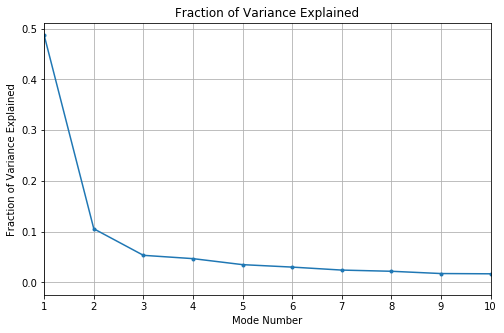

In [28]:
fig = plt.figure(figsize=(8,5))
plt.plot(np.arange(1,np.size(ds_eofs['time'])+1),solver.varianceFraction().values,'.-')
solver.varianceFraction().values[0]+solver.varianceFraction().values[1]
plt.xlim([1,10])
plt.title('Fraction of Variance Explained')
plt.xlabel('Mode Number')
plt.ylabel('Fraction of Variance Explained')
plt.grid()
plt.savefig(var+'_frac_variance_explained.png')

In [29]:
for i in np.arange(0,4):
    print('EOF '+str(i+1))
    print(solver.varianceFraction().values[i])
#print(solver.varianceFraction().values[0:2])

EOF 1
0.48669016264552556
EOF 2
0.10571669594854063
EOF 3
0.05342658570270789
EOF 4
0.04689114239205915


/glade/u/home/czarakas/coupled_PPE/code/utils/quick_map.py:71: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(clim)


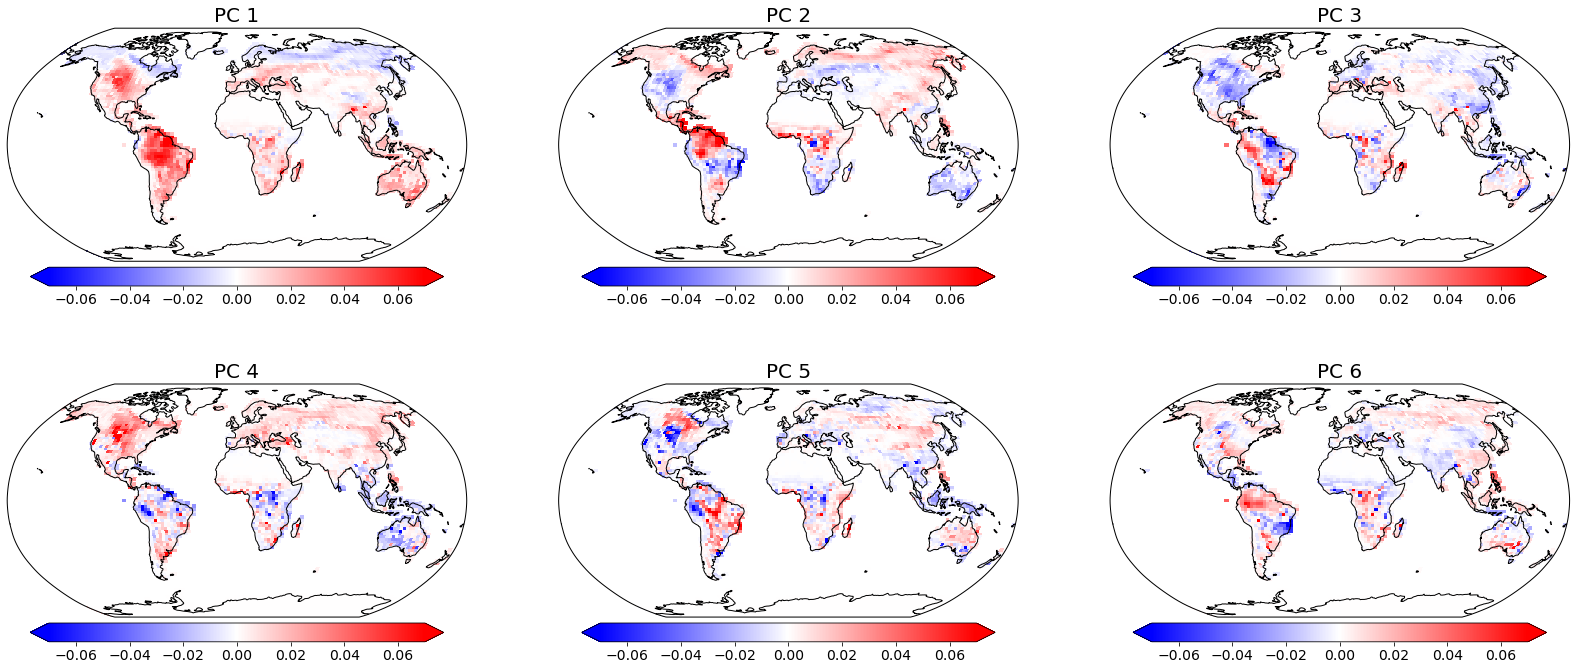

In [30]:
lats = eofs['lat'].values
lons = eofs['lon'].values
fig = plt.figure(figsize=(28, 12))
for i in range(0,6):
    quick_map.quick_map_subplot(eofs[:,:,i].values,lats,lons, nrow=2, ncol=3, ind=i,
                                clim=[-0.07,0.07],cmap=plt.cm.bwr,
                                title='PC '+str(i+1))
plt.savefig(var+'_PCs.png')

North test for EOF significance, from North et al. (1982)

In [73]:
mapdata=(eofs[:,:,0])#(var_array_coupled-var_array_offline).std(dim='ensemble_key')*86400

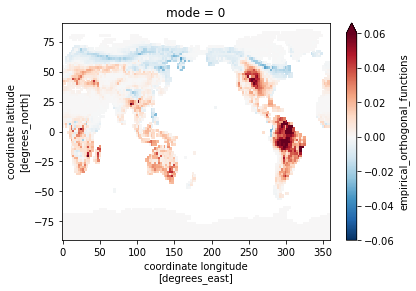

In [57]:
(eofs[:,:,0]).plot(vmax=0.06)

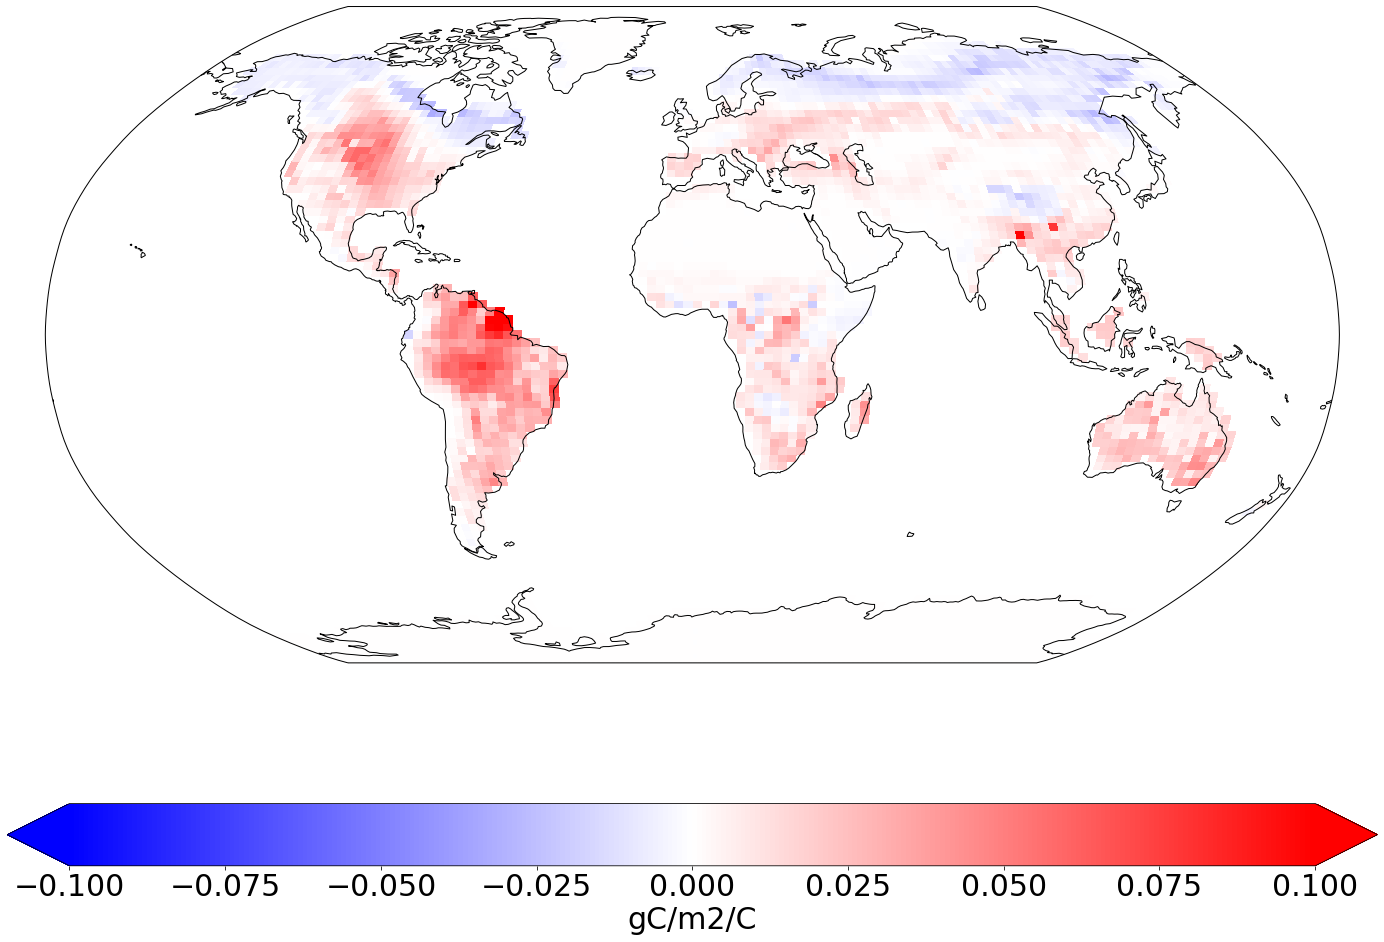

In [104]:
plt.rcParams.update({'font.size': 30})
fig = plt.figure(figsize=(20,14))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()

cyclic_data, cyclic_lons = add_cyclic_point(mapdata.where(landfrac>0.7), coord=mapdata.lon) #
plt.pcolormesh(cyclic_lons, mapdata.lat, #contourf
             cyclic_data, 
             cmap=plt.cm.get_cmap("bwr"), vmin=-0.1, vmax=0.1,#=[-0.1,0.1],#levels=np.arange(-0.1,0.11,0.01),
             transform=ccrs.PlateCarree())# extend='both')
"""
plt.contourf(cyclic_lons, mapdata.lat, #contourf
             cyclic_data, 
             cmap=plt.cm.get_cmap("bwr"), levels=np.arange(-0.1,0.11,0.01),
             transform=ccrs.PlateCarree(), extend='both')
"""
plt.colorbar(extend='both', orientation='horizontal', label='gC/m2/C')
plt.tight_layout()
plt.savefig('EOF1.png')




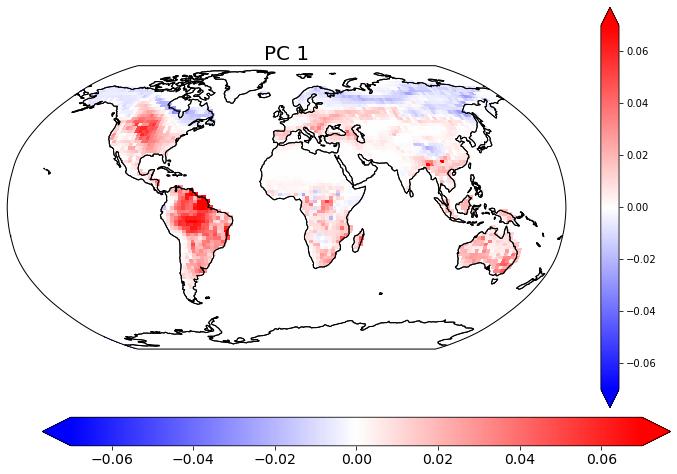

In [80]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()
ax.set_global()

cyclic_data, cyclic_lons = add_cyclic_point(mapdata, coord=mapdata.lon)
quick_map.quick_map_subplot(mapdata.where(landfrac>0.7).values,lats,lons, nrow=1, ncol=1, ind=0,
                                clim=[-0.07,0.07],cmap=plt.cm.bwr,
                                title='PC '+str(1))
#plt.contourf(mapdata.lon, mapdata.lat, #contourf
#             mapdata, 
#             cmap=plt.cm.get_cmap("RdBu_r"), levels=np.arange(-0.7,0.8,0.1),
#             transform=ccrs.PlateCarree(), extend='both')
plt.colorbar(extend='both')
plt.tight_layout()
plt.savefig('EOF1.png')


TypeError: Input z must be a 2D array.

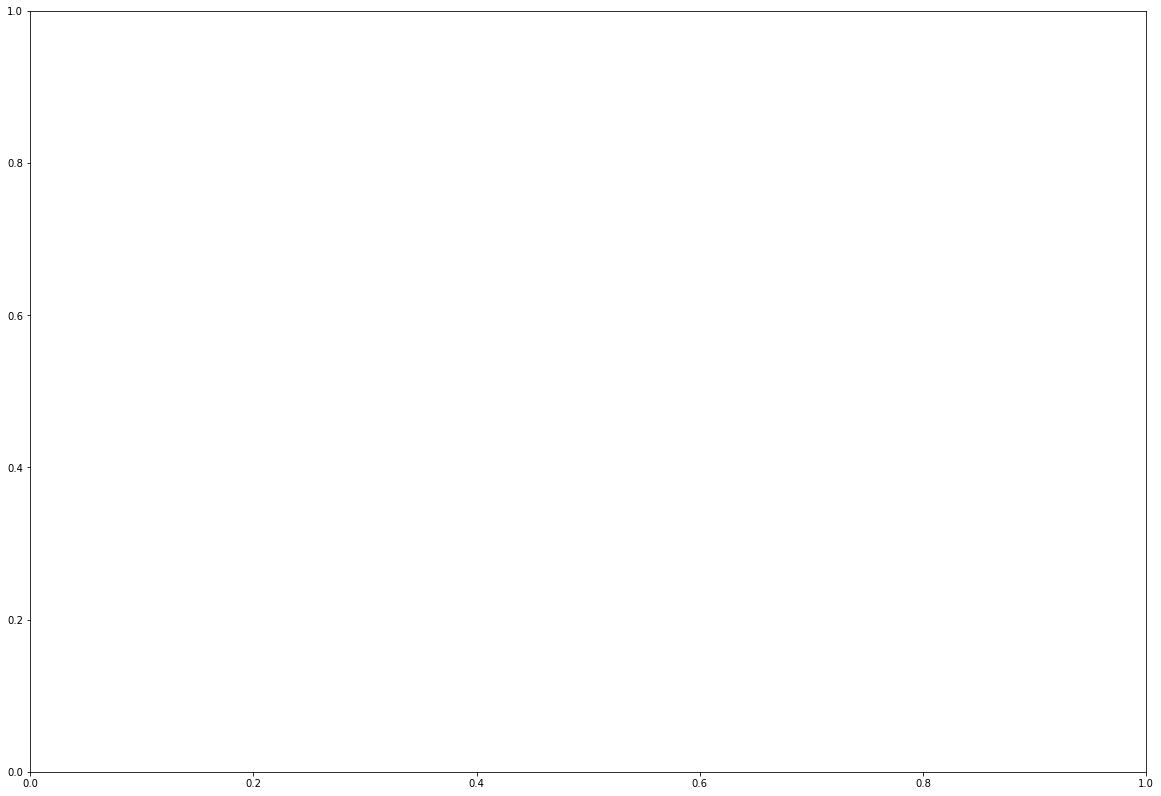

In [42]:
plt.figure(figsize=(20,14))
plt.contourf(mapdata, lats, lons)#, cmap=plt.cm.RdBu_r, nrow=1, ncol=2, 
                          # clim=[-3,3])
#,lats,lons, nrow=2, ncol=3, ind=i,
#                                ,cmap=plt.cm.bwr,
#                                title='PC '+str(i+1))

In [36]:
import matplotlib as mpl

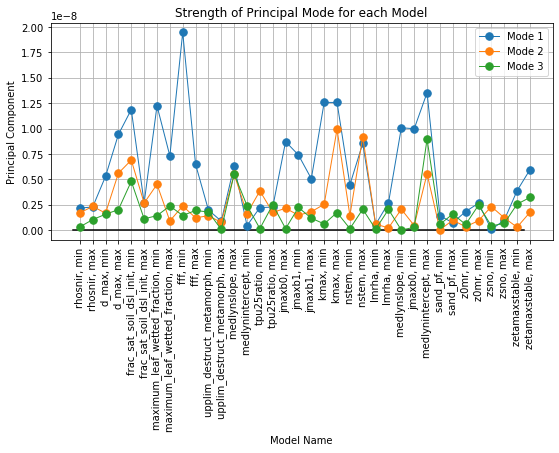

In [39]:
labels=descriptions#var_array.ensemble_key.values
fig = plt.figure(figsize=(9, 4))
plt.plot([0.5,np.size(labels)-0.5],[0,0],'-k')
for i in range(0,3):
    pcs_annual = np.abs(pcs[:,i])
    plt.plot(np.arange(1,np.size(pcs_annual['time'])+1),
             pcs_annual,label='Mode '+str(i+1),linewidth=1,marker='.',markersize=15)
    plt.xlabel('Model Name')
    plt.ylabel('Principal Component')
    plt.title('Strength of Principal Mode for each Model')
plt.legend()
#plt.xlim([0.5,np.size(labels)-0.5])
plt.xticks(np.arange(1,np.size(labels)+0.5,1),labels=labels, rotation=90)
plt.grid()
plt.savefig(var+'_strength_principal_mode_per_sim.png')

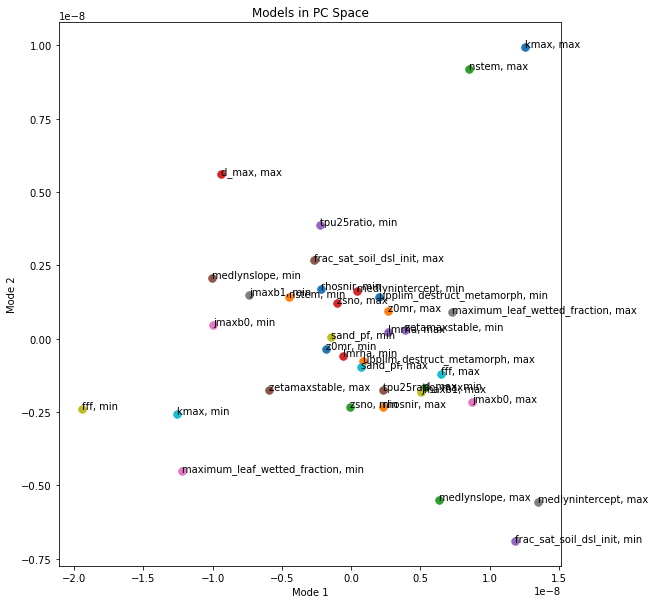

In [40]:
fig = plt.figure(figsize=(9, 10))
#plt.plot([-500,170],[0,0],'-k')
#plt.plot([0,0],[-175,150],'-k')
pc1 = (pcs[:,0].values)
pc2 = (pcs[:,1].values)
for m, modelname in enumerate(labels):
    if modelname=='CESM2':
        plt.plot(pc1[m], pc2[m],'.k',linewidth=0,markersize=15, label=modelname)
    else:
        plt.plot(pc1[m], pc2[m],marker='.',linewidth=0,markersize=15, label=modelname)
    plt.annotate(modelname, [pc1[m], pc2[m]])
plt.xlabel('Mode 1')
plt.ylabel('Mode 2')
plt.title('Models in PC Space')
#plt.legend(fontsize=12)
#plt.xlim([-100,150])
#plt.ylim([-20,70])
plt.savefig(var+'_PC1vsPC2_projection.png')

In [41]:
crosswalk['PCmode1']=np.nan

In [43]:
test=0
for i, desc in enumerate(var_array_coupled.ensemble_key.values):
    print(desc)
    test=test+1
    crosswalk['PCmode1'][i+1]=pc1[i]

0001
0037
0007
0008
0009
0010
0013
0014
0015
0016
0017
0018
0019
0020
0021
0022
0023
0024
0025
0026
0027
0028
0029
0030
0031
0032
0033
0034
0035
0036
0003
0004
0005
0006
0011
0012


/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [44]:
params=['frac_sat_soil_dsl_init','d_max', 'fff','sand_pf',
        'upplim_destruct_metamorph', 'z0mr', 'zetamaxstable', 'zsno',
        'jmaxb0', 'jmaxb1', 'lmrha',
         'medlynintercept','kmax','medlynslope','rhosnir',
        'nstem','maximum_leaf_wetted_fraction']
param_colors=['blue','blue', 'blue','blue',
        'purple', 'purple', 'purple', 'purple',
        'forestgreen', 'forestgreen', 'forestgreen',
        'lightseagreen', 'lightseagreen','lightseagreen','lightgreen',
        'orange','orange']

(-1, 17)

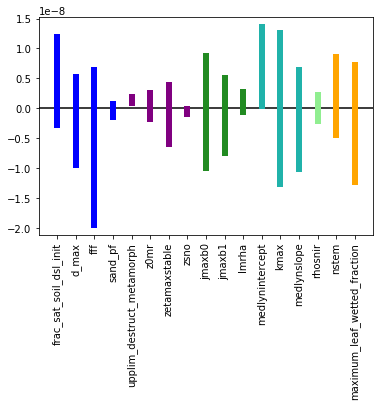

In [45]:
plt.plot([-1,np.size(params)],[0,0],'-k')
for i, param in enumerate(params):
    minval=crosswalk['PCmode1'][:36].values[crosswalk.description==param+', min']
    maxval=crosswalk['PCmode1'][:36].values[crosswalk.description==param+', max']
    plt.plot([i,i], [minval,maxval],'.-', linewidth=6, color=param_colors[i])

plt.xticks(np.arange(0, i+1), params, rotation='vertical')
plt.xlim([-1,np.size(params)])

In [46]:
colors = ['black','teal','brown','lightskyblue','orange','green','dodgerblue','red',
         'grey','mediumblue']

#manual_ordered = manual_ordered.sort_values(['col', 'index'], ascending=[False, True])
source = crosswalk
points=alt.Chart(source).mark_bar(filled=True).encode(
    x=alt.X('param', sort=alt.SortField(field="global_nonglacland_temp",
                                        order='parameter category')),#, scale=alt.Scale(domain=[minval, maxval])),
    y=alt.Y('global_nonglacland_temp'),#,scale=alt.Scale(domain=[minval, maxval])),
    #opacity='parameter domain',
    color=alt.Color('parameter category', scale=alt.Scale(range=colors)),
    opacity='minmax',
    tooltip=['param', 
             'parameter description',
             'parameter domain', 
             'parameter category', 
             #'global_nonglacland_temp'
             'minmax']
)#.interactive()

points

NameError: name 'alt' is not defined

# EOF of change
Normalize by subtract temperature change at each point from global mean change

In [176]:
var_array_delta = make_multisimulation_dataset.make_empty_dataarray(ds_grid=ds_grid, var=var, keys=keys)

In [177]:
globalmean_temp_ref=(ref_tseries*areaweights).sum(dim=['lat','lon']).mean(dim='year').values
ref_tseries_annual = ref_tseries.mean(dim='year')

In [178]:
for i, key in enumerate(var_array.ensemble_key):
    ds = var_array[:,:,i]
    globalmean_temp = ((ds*areaweights).sum(dim=['lat','lon']).values)
    globalmean_temp_delta = globalmean_temp-globalmean_temp_ref
    ds_delta = ds - ref_tseries_annaul
    var_array_delta[:,:,i]=ds_delta-globalmean_temp_delta

In [179]:
ds_eofs=var_array_delta

In [180]:
# Rearrange all-model dataset for EOF
ds_eofs=ds_eofs.transpose()
ds_eofs=ds_eofs.rename({"ensemble_key": "time"})
ds_eofs['time']=np.arange('2000-01-01', '2000-02-06', dtype='datetime64') #11
ds_eofs=ds_eofs-ds_eofs.mean(dim='time')

In [181]:
solver = Eof(ds_eofs, weights=areaweights.transpose())
eofs = solver.eofs()
eofs = eofs.transpose()
pcs = solver.pcs()

In [259]:
var_array_coupled_diff=var_array_coupled-basecase_lnd[var].mean(dim='time')
var_array_offline_diff=var_array_offline-basecase_lnd[var].mean(dim='time')

/glade/u/home/czarakas/.conda/envs/EOF_env/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


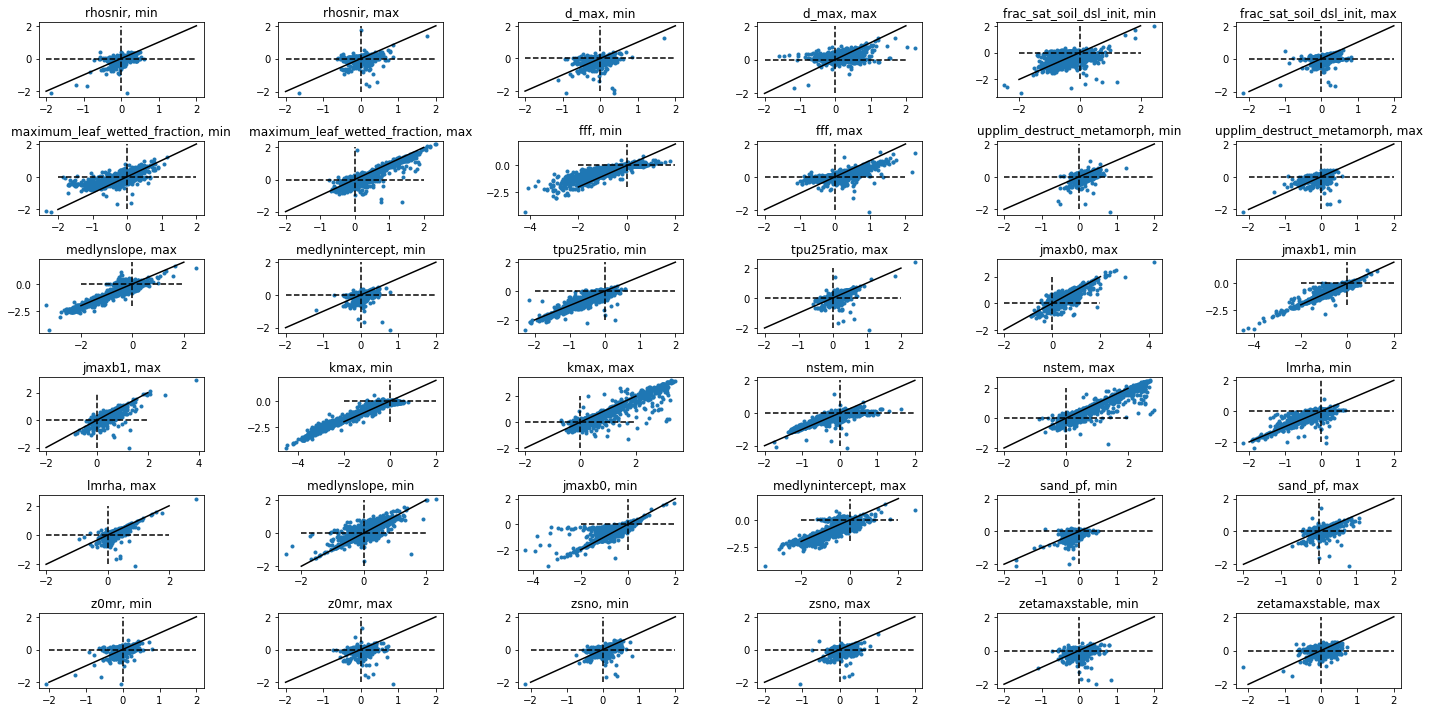

In [260]:
unitconv=86400
minval=-2
maxval=2
plt.figure(figsize=(20,10))
for i in np.arange(0,36):
    plt.subplot(6,6,i+1)
    plt.plot(var_array_coupled_diff[:,:,i].values.flatten()*unitconv,
         var_array_offline_diff[:,:,i].values.flatten()*unitconv,'.')
    plt.plot([minval,maxval],[minval,maxval],'-k')
    plt.plot([0,0],[minval,maxval],'--k')
    plt.plot([minval,maxval],[0,0],'--k')
    plt.title(descriptions[i])
plt.tight_layout()

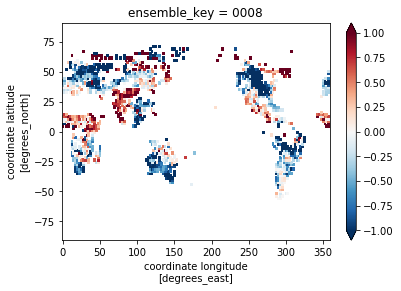

In [265]:
i=3
diff_diff=var_array_coupled_diff[:,:,i]-var_array_offline_diff[:,:,i]
#(var_array_coupled_diff[:,:,i]*86400).plot(vmin=-1, vmax=1, cmap=plt.cm.bwr)
#(var_array_offline_diff[:,:,i]*86400).plot(vmin=-1, vmax=1, cmap=plt.cm.bwr)
#(diff_diff*86400).plot(vmin=-1, vmax=1, cmap=plt.cm.bwr)
filterdata=np.abs(var_array_offline_diff[:,:,i]*86400)>0.1
(diff_diff.where(filterdata)/var_array_offline_diff[:,:,i]).plot(vmin=-1, vmax=1, cmap=plt.cm.RdBu_r)

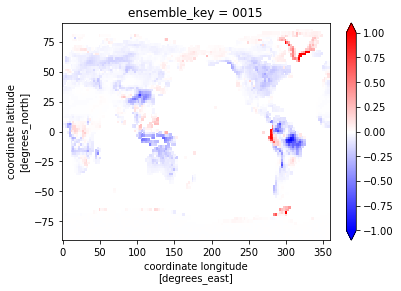

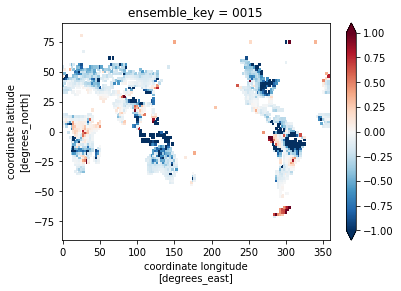

## Make figures

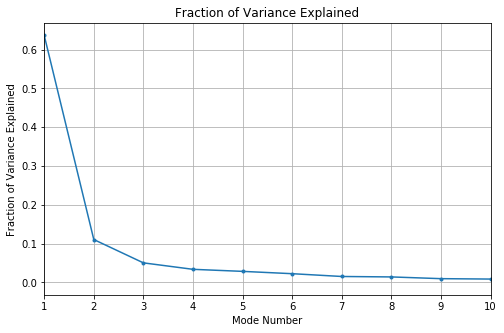

In [182]:
fig = plt.figure(figsize=(8,5))
plt.plot(np.arange(1,np.size(ds_eofs['time'])+1),solver.varianceFraction().values,'.-')
solver.varianceFraction().values[0]+solver.varianceFraction().values[1]
plt.xlim([1,10])
plt.title('Fraction of Variance Explained')
plt.xlabel('Mode Number')
plt.ylabel('Fraction of Variance Explained')
plt.grid()
plt.savefig(var+'_frac_variance_explained.png')

In [183]:
for i in np.arange(0,4):
    print('EOF '+str(i+1))
    print(solver.varianceFraction().values[i])
    print(solver.varianceFraction().values[0:i])

EOF 1
0.6365110076621779
EOF 2
0.11052123000891595
EOF 3
0.050436572749108656
EOF 4
0.03380490549290501


/glade/u/home/czarakas/coupled_PPE/code/analyze_simulations/quick_map.py:71: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.
  cbar.set_clim(clim)


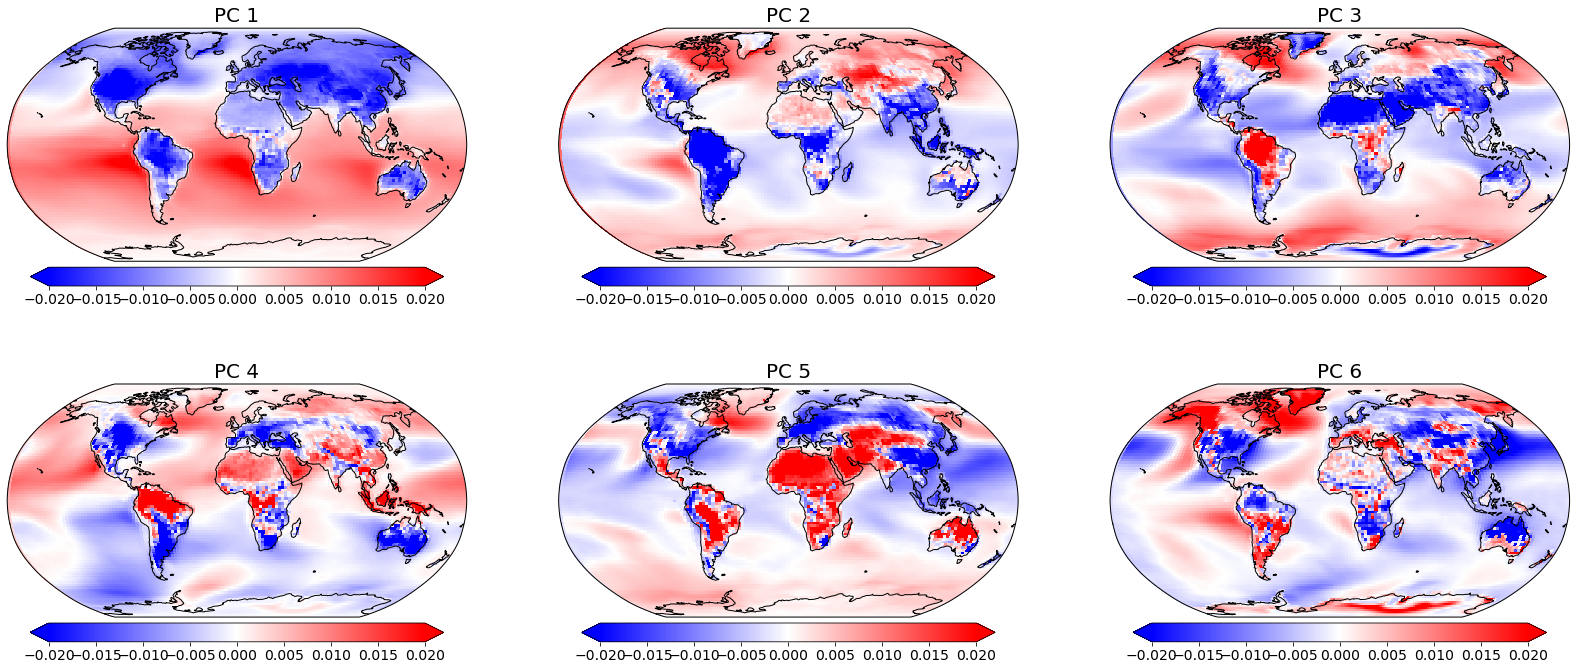

In [184]:
lats = eofs['lat'].values
lons = eofs['lon'].values
fig = plt.figure(figsize=(28, 12))
for i in range(0,6):
    quick_map.quick_map_subplot(eofs[:,:,i].values,lats,lons, nrow=2, ncol=3, ind=i,
                                clim=[-0.02,0.02],cmap=plt.cm.bwr,
                                title='PC '+str(i+1))
plt.savefig(var+'_PCs.png')

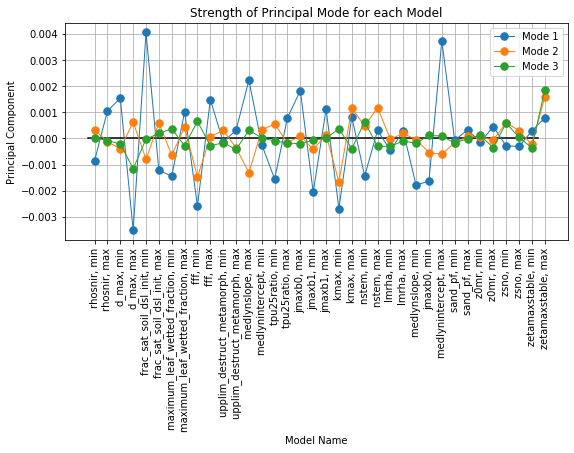

In [185]:
labels=descriptions#var_array.ensemble_key.values
fig = plt.figure(figsize=(9, 4))
plt.plot([0.5,np.size(labels)-0.5],[0,0],'-k')
for i in range(0,3):
    pcs_annual = pcs[:,i]
    plt.plot(np.arange(1,np.size(pcs_annual['time'])+1),
             pcs_annual,label='Mode '+str(i+1),linewidth=1,marker='.',markersize=15)
    plt.xlabel('Model Name')
    plt.ylabel('Principal Component')
    plt.title('Strength of Principal Mode for each Model')
plt.legend()
#plt.xlim([0.5,np.size(labels)-0.5])
plt.xticks(np.arange(1,np.size(labels)+0.5,1),labels=labels, rotation=90)
plt.grid()
plt.savefig(var+'_strength_principal_mode_per_sim.png')

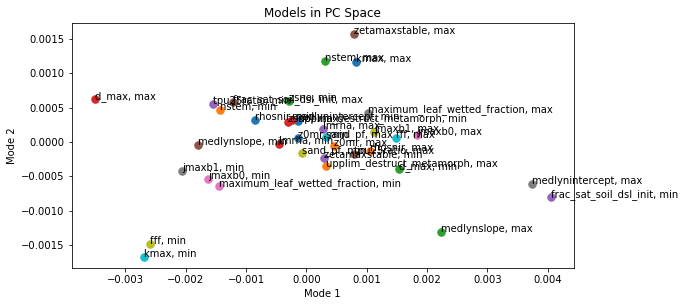

In [186]:
fig = plt.figure(figsize=(9, 4.5))
#plt.plot([-500,170],[0,0],'-k')
#plt.plot([0,0],[-175,150],'-k')
pc1 = pcs[:,0].values
pc2 = pcs[:,1].values
for m, modelname in enumerate(labels):
    if modelname=='CESM2':
        plt.plot(pc1[m], pc2[m],'.k',linewidth=0,markersize=15, label=modelname)
    else:
        plt.plot(pc1[m], pc2[m],marker='.',linewidth=0,markersize=15, label=modelname)
    plt.annotate(modelname, [pc1[m], pc2[m]])
plt.xlabel('Mode 1')
plt.ylabel('Mode 2')
plt.title('Models in PC Space')
#plt.legend(fontsize=12)
#plt.xlim([-100,150])
#plt.ylim([-20,70])
plt.savefig(var+'_PC1vsPC2_projection.png')